In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
 
# Load the dataset
file_path = 'C:/Users/JayasankariRR/Desktop/DS_mini/merged_data 3 1.csv' 
df = pd.read_csv(file_path)
 
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())
 
# Data Cleaning
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())
 
# Fill missing values (example: filling numerical columns with 0 and categorical with mode)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
 
df[numerical_columns] = df[numerical_columns].fillna(0)
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])
 
df['churn_utilization'] = (
    (df['seat_utilization'] < 0.2) |
    (df['agent_utilization'] < 0.2)
).astype(int)
 
# Group by 'id' and calculate the average of current_arr and future_arr for each id
grouped_df = df.groupby('id').agg({
    'current_arr': 'mean',
    'future_arr': 'mean',
    'churn_utilization': 'max'  # If any row for the id has churn_utilization = 1, set it to 1
}).reset_index()
 
# Add a churn column based on the condition avg(future_arr) < avg(current_arr)
grouped_df['churn'] = (grouped_df['future_arr'] < grouped_df['current_arr']).astype(int)
 
# Merge the churn column back into the original dataset
df = df.merge(grouped_df[['id', 'churn']], on='id', how='left')
 
# Drop intermediate columns if not needed
df = df.drop(columns=['churn_utilization'])
 
# Display the updated dataset with the churn column
print("\nUpdated Dataset with Churn Column:")
print(df.head())
 
# Save the updated dataset to a new CSV file
output_file_path = 'C:/Users/JayasankariRR/Desktop/DS_mini/updated_dataset_with_churn.csv'  # Update with your desired file path
df.to_csv(output_file_path, index=False)
 
print(f"\nUpdated dataset with 'churn' column has been saved to: {output_file_path}")

Dataset Preview:
              id  score_date  segment_smb  segment_non_smb  \
0   JMAN_2429072  2023-02-10            1                0   
1   JMAN_9043466  2023-01-13            0                1   
2   JMAN_2452556  2023-02-24            0                1   
3   JMAN_2455113  2023-03-03            0                1   
4  JMAN_18127937  2023-02-10            0                1   

   segment_commercial  segment_enterprise  segment_midmarket  region_emea  \
0                   0                   0                  0            1   
1                   1                   0                  0            1   
2                   0                   0                  0            1   
3                   0                   0                  0            1   
4                   0                   0                  0            1   

   region_apac  region_latam  ...  max_seats  agent_utilization  \
0            0             0  ...        2.0           0.500000   
1            

Utilization p-value: 0.0000


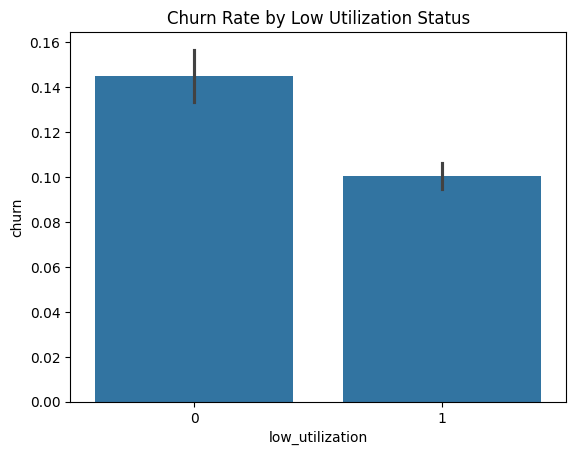

In [10]:
# Create composite utilization flag
df['low_utilization'] = ((df['seat_utilization'] < 0.2) | 
                        (df['agent_utilization'] < 0.2)).astype(int)

# Chi-square test
contingency_table = pd.crosstab(df['low_utilization'], df['churn'])
chi2, pval, _, _ = stats.chi2_contingency(contingency_table)
print(f"Utilization p-value: {pval:.4f}")

# Visualize
sns.barplot(x='low_utilization', y='churn', data=df)
plt.title('Churn Rate by Low Utilization Status')
plt.show()

In [ ]:
Here are some hypotheses for customer churn based on the provided columns:

1. **Segment Hypothesis**:
    - Customers in the `segment_smb` or `segment_non_smb` segments may have higher churn rates compared to other segments due to limited resources or smaller scale operations.

2. **Region Hypothesis**:
    - Customers in specific regions (e.g., `region_emea`, `region_apac`, `region_latam`, `region_amer`) may exhibit different churn rates due to regional market conditions or service availability.

3. **Customer Age Hypothesis**:
    - Customers with lower `customer_age_quarters` (newer customers) may have higher churn rates as they are still evaluating the service.

4. **Sales Assistance Hypothesis**:
    - Customers with `sales_assisted` flag set to 1 may have lower churn rates due to personalized support.

5. **Legacy Flag Hypothesis**:
    - Customers with `legacy_flag` set to 1 may have higher churn rates due to outdated systems or dissatisfaction with legacy products.

6. **Product Count Hypothesis**:
    - Customers with fewer `product_counts` may have higher churn rates as they are less invested in the ecosystem.

7. **Billing Issues Hypothesis**:
    - Customers with `billing_dunning_not_ok` set to 1 may have higher churn rates due to unresolved billing issues.

8. **Industry and Employee Range Hypothesis**:
    - Customers in specific `crm_industry_current` or `crm_employee_range` categories may have higher churn rates due to industry-specific challenges or company size.

9. **Customer Satisfaction Hypothesis**:
    - Customers with lower `csat_score` or `nps_score` may have higher churn rates due to dissatisfaction with the service.

10. **Outage Impact Hypothesis**:
     - Customers with higher `num_low_sev_outages` or `num_high_sev_outages` may have higher churn rates due to service reliability issues.

11. **ARR Change Hypothesis**:
     - Customers with negative `arr_change` or `seat_change_arr` may have higher churn rates as they reduce their spending or usage.

12. **Utilization Hypothesis**:
     - Customers with lower `seat_utilization` or `agent_utilization` may have higher churn rates due to underutilization of the service.

13. **Discount Hypothesis**:
     - Customers with higher `discount_arr_usd` or `discount_arr_usd_percentage` may have lower churn rates as discounts incentivize retention.

14. **Provisioning Hypothesis**:
     - Customers with `is_provisioned_any_channel_M_before` set to 1 may have lower churn rates due to better onboarding experiences.

These hypotheses can be tested using statistical methods such as t-tests, chi-square tests, or regression analysis to identify significant predictors of churn.

In [20]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ----------------- ---------------------- 4.2/9.8 MB 25.0 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 17.7 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 15.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\JayasankariRR\AppData\Local\Temp\ipykernel_19896\2910097949.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['churn'] for name, group in df.groupby('outage_severity')]
C:\Users\JayasankariRR\AppData\Local\Temp\ipykernel_19896\2910097949.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, pval = stats.f_oneway(*groups)
C:\Users\JayasankariRR\AppData\Local\Temp\ipykernel_19896\2910097949.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('outage_severity')['churn']

Outage severity p-value: nan


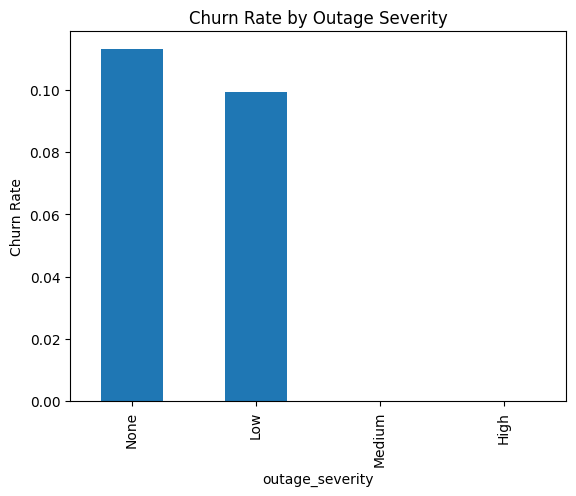

In [11]:
# Bin outage counts
df['outage_severity'] = pd.cut(df['num_high_sev_outages'],
                              bins=[-1, 0, 1, 5, np.inf],
                              labels=['None','Low','Medium','High'])

# ANOVA test
groups = [group['churn'] for name, group in df.groupby('outage_severity')]
f_stat, pval = stats.f_oneway(*groups)
print(f"Outage severity p-value: {pval:.4f}")

# Visualize
df.groupby('outage_severity')['churn'].mean().plot(kind='bar')
plt.title('Churn Rate by Outage Severity')
plt.ylabel('Churn Rate')
plt.show()


Hypothesis 1: Customers with seat utilization <20% have higher churn


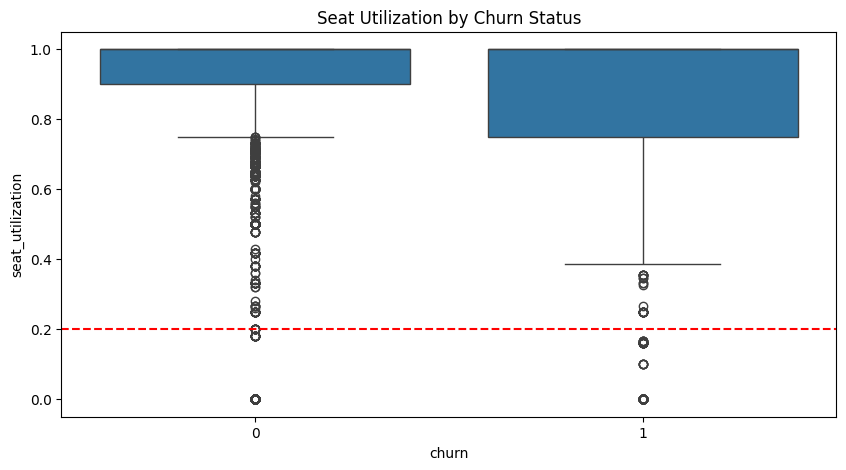

Churn rate - Low util: 8.28%, High util: 11.59%


In [13]:
print("\nHypothesis 1: Customers with seat utilization <20% have higher churn")
plt.figure(figsize=(10, 5))
sns.boxplot(x='churn', y='seat_utilization', data=df)
plt.axhline(y=0.2, color='r', linestyle='--')
plt.title('Seat Utilization by Churn Status')
plt.show()

# Statistical test
low_util_churn = df[df['seat_utilization'] < 0.2]['churn'].mean()
high_util_churn = df[df['seat_utilization'] >= 0.2]['churn'].mean()
t_stat, p_val = stats.ttest_ind(
    df[df['seat_utilization'] < 0.2]['churn'],
    df[df['seat_utilization'] >= 0.2]['churn'],
    equal_var=False
)
print(f"Churn rate - Low util: {low_util_churn:.2%}, High util: {high_util_churn:.2%}")



Hypothesis 6: Product Count vs Churn


C:\Users\JayasankariRR\AppData\Local\Temp\ipykernel_19896\660625542.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_products = df.groupby('product_count_bin')['churn'].mean().reset_index()


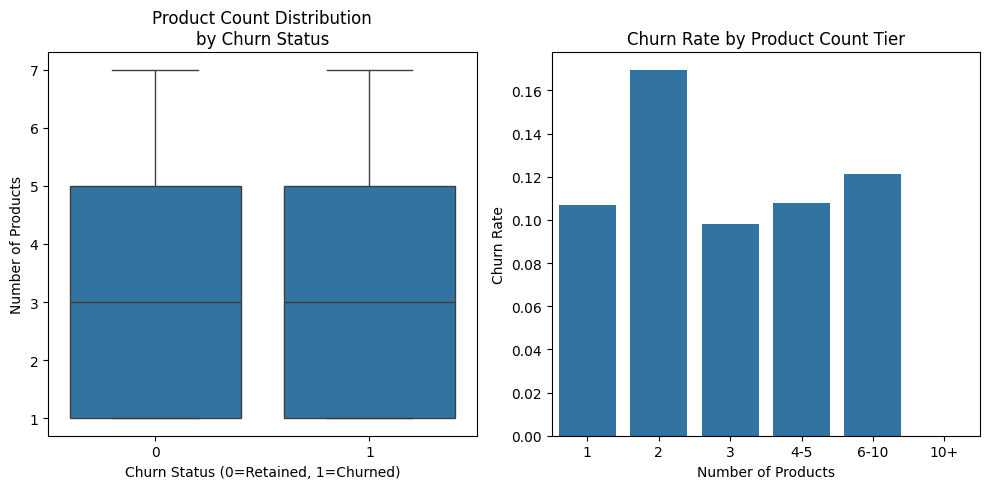

Churn Rate - Few products (≤2): 11.94%
Churn Rate - Many products (>2): 10.67%
T-test p-value: 0.0222


NameError: name 'sm' is not defined

In [23]:
# Hypothesis 6: Customers with fewer product_counts have higher churn rates
print("\nHypothesis 6: Product Count vs Churn")
plt.figure(figsize=(10, 5))

# Visualization 1: Boxplot of product counts by churn status
plt.subplot(1, 2, 1)
sns.boxplot(x='churn', y='product_counts', data=df)
plt.title('Product Count Distribution\nby Churn Status')
plt.xlabel('Churn Status (0=Retained, 1=Churned)')
plt.ylabel('Number of Products')

# Visualization 2: Churn rate by product count bins
plt.subplot(1, 2, 2)
df['product_count_bin'] = pd.cut(df['product_counts'], 
                                bins=[0, 1, 2, 3, 5, 10, np.inf],
                                labels=['1', '2', '3', '4-5', '6-10', '10+'])
churn_by_products = df.groupby('product_count_bin')['churn'].mean().reset_index()
sns.barplot(x='product_count_bin', y='churn', data=churn_by_products)
plt.title('Churn Rate by Product Count Tier')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.tight_layout()
plt.show()

# Statistical Test 1: T-test between groups
few_products = df[df['product_counts'] <= 2]['churn']  # 0-2 products
many_products = df[df['product_counts'] > 2]['churn']  # 3+ products
t_stat, p_val = stats.ttest_ind(few_products, many_products, equal_var=False)

print(f"Churn Rate - Few products (≤2): {few_products.mean():.2%}")
print(f"Churn Rate - Many products (>2): {many_products.mean():.2%}")
print(f"T-test p-value: {p_val:.4f}")

# Statistical Test 2: Logistic regression
X = sm.add_constant(df['product_counts'])
y = df['churn']
logit_model = sm.Logit(y, X).fit()
print("\nLogistic Regression Results:")
print(logit_model.summary())
print(f"Odds Ratio per additional product: {np.exp(logit_model.params[1]):.3f}")

# Actionable Insight
risk_customers = df[(df['product_counts'] <= 2) & (df['churn'] == 0)]
print(f"\n{len(risk_customers)} at-risk customers using ≤2 products")